In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## 1) 載入資料集

In [4]:
# df_train = pd.read_csv('./data/Iris.csv')
df_train = pd.read_csv('https://github.com/tempzeba/iris-dnn-tensorflow/raw/master/data/Iris.csv')
df_train = df_train.drop(labels=['Id'],axis=1) # 移除Id
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 2) 手動編碼
處理名目資料 (Nominal variables) - 資料前處理
依據特徵資料的特性，可以選擇手動編碼或自動編碼。

### 使用編碼時機?
進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

ex:

|  Iris-setosa |  Iris-versicolor | Iris-virginica  |
|:---:|:---:|:---:|
|  1 | 2  | 3  |

In [5]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#將編碼後的label map存至df_train['Species']中。
df_train['Class'] = df_train['Species'].map(label_map)

In [6]:
df_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## 3) 檢查缺失值
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

```python
# 移除缺失值
train=train.dropna()
```

In [7]:
df_train = df_train.drop(labels=['Species'],axis=1) # 移除Species
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(df_train))[0]))

checked missing data(NAN mount): 0


## 4) 將輸出特徵做one-hot encoding
如何對欄位class做one-hot encoding？
#### class 的值有0,1,2

In [8]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(df_train['Class'])
y[0:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## 4) 切割訓練集與測試集

In [9]:
X=df_train.drop(labels=['Class'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=.3 , random_state=40)

In [11]:
print('訓練資料: ',X_train.shape)
print('測試資料: ',X_test.shape)

訓練資料:  (105, 4)
測試資料:  (45, 4)


## 5) 建立網路模型

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [13]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
model = Sequential()
model.add(Dense(8, Activation('relu'), input_dim=X.shape[-1]))
model.add(Dense(16, Activation('relu')))
model.add(Dense(3, Activation('softmax')))

In [14]:
model.summary()   # Weights = (4+1)*8+(8+1)*16+(16+1)*3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=1
epochs = 50

# 訓練模型
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/50
94/94 [==============================] - 0s 3ms/step - loss: 1.1386 - acc: 0.3511 - val_loss: 1.0033 - val_acc: 0.2727
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.8402 - acc: 0.6064 - val_loss: 0.8171 - val_acc: 0.3636
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6696 - acc: 0.6702 - val_loss: 0.7760 - val_acc: 0.3636
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5582 - acc: 0.7128 - val_loss: 0.6042 - val_acc: 0.6364
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4862 - acc: 0.7660 - val_loss: 0.5858 - val_acc: 0.6364
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.4347 - acc: 0.8404 - val_loss: 0.5031 - val_acc: 0.7273
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3885 - acc: 0.9043 - val_loss: 0.5535 - val_acc: 0.6364
Epoch 8/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3653 - acc: 0.90

## 6) 觀察訓練結果

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

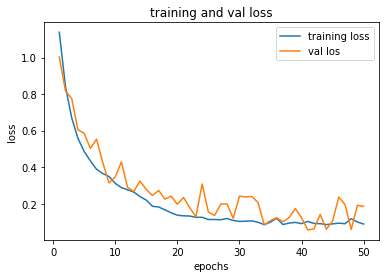

In [17]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

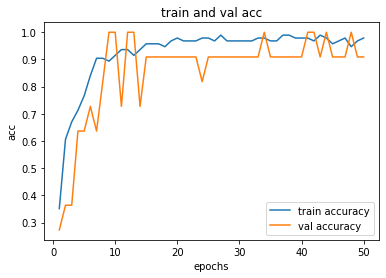

In [18]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 測試

In [19]:
from sklearn.metrics import accuracy_score
label=np.argmax(y,axis=1)
pred =  np.argmax(model.predict(X), axis=1)
print(accuracy_score(label, pred))

0.9733333333333334
